## Using the csv file of Korean Basket ball Guard player, to figure out their playstle with K-means

In [ ]:
#Import Libraries 
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns



/Users/hwang-eunji/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family

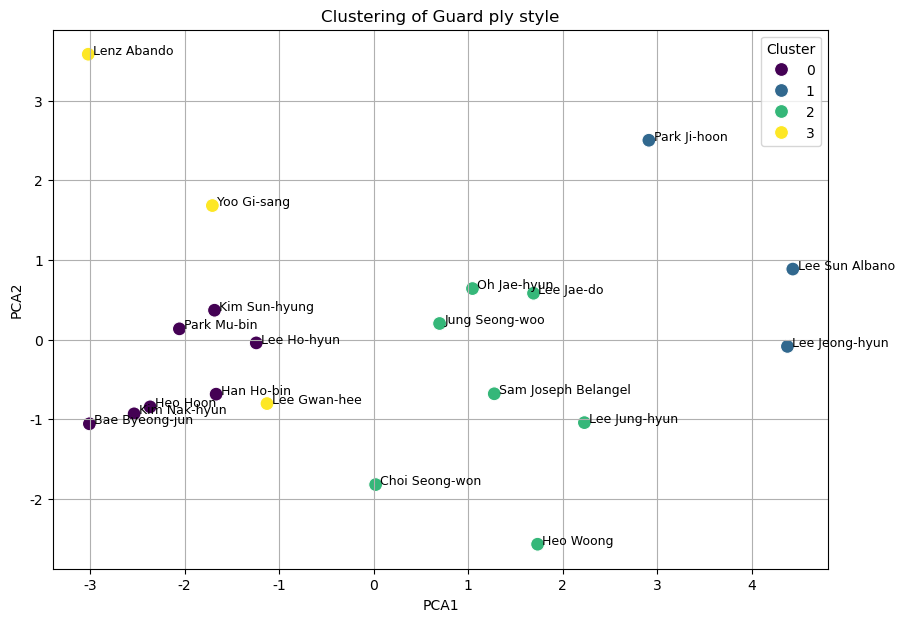

,GP,PTS,AST,STL,BLK,TO,OREB,DREB,3PM,2PM
Cluster,,,,,,,,,,
0,36.285714,350.857143,116.714286,30.857143,2.857143,46.857143,21.857143,57.142857,50.857143,76.857143
1,50.333333,834.333333,292.666667,80.333333,6.333333,105.000000,41.000000,125.666667,91.000000,218.666667
2,52.285714,605.428571,212.000000,45.428571,2.285714,81.714286,22.428571,102.142857,83.428571,127.571429
3,45.333333,407.000000,40.000000,30.333333,20.666667,35.666667,36.000000,79.666667,62.333333,80.333333


In [ ]:
# Laod data 

df = pd.read_csv("center.csv")

# Select the main columns 
features = ["GP", "PTS", "AST", "STL", "BLK", "TO", "OREB", "DREB","3PM","2PM"]
X = df[features]

# Standarzation 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Implement the K-Means k=4
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X_scaled)
df['Cluster'] = clusters

# Using PCA to visualized the 2-dimension
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]


# Plotting the Clustering result 
plt.figure(figsize=(10, 7))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df, palette='viridis', s=100)
for i, name in enumerate(df['Player']):
    plt.text(df.loc[i, 'PCA1'] + 0.05, df.loc[i, 'PCA2'], name, fontsize=9)
plt.title("Clustering of Guard ply style")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.legend(title="Cluster")
plt.grid()
plt.show()



# Summarized the Cluster results 
cluster_summary = df.groupby('Cluster')[features].mean()
cluster_summary

/Users/hwang-eunji/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family

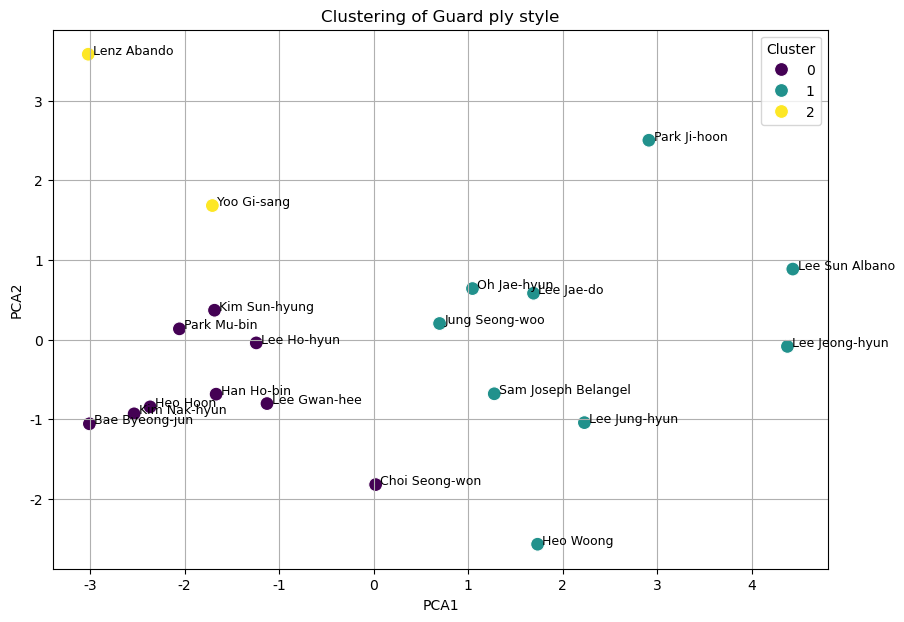

,GP,PTS,AST,STL,BLK,TO,OREB,DREB,3PM,2PM
Cluster,,,,,,,,,,
0,39.666667,391.555556,119.333333,29.888889,3.000000,48.444444,20.666667,61.111111,59.666667,79.666667
1,52.000000,686.333333,240.333333,58.555556,3.888889,90.888889,29.333333,114.222222,83.888889,162.777778
2,41.000000,358.500000,31.000000,35.000000,27.500000,34.000000,45.500000,76.500000,54.000000,73.000000


In [ ]:


# Set the K  = 3 
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)
df['Cluster'] = clusters

# Using PCA to visualized the 2-dimension
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]


# Visualize the Clustering result 
plt.figure(figsize=(10, 7))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df, palette='viridis', s=100)
for i, name in enumerate(df['Player']):
    plt.text(df.loc[i, 'PCA1'] + 0.05, df.loc[i, 'PCA2'], name, fontsize=9)
plt.title("Clustering of Guard ply style")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.legend(title="Cluster")
plt.grid()
plt.show()


# Summarized the Clustering 
cluster_summary = df.groupby('Cluster')[features].mean()
cluster_summary

/Users/hwang-eunji/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/hwang-eunji/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/hwang-eunji/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/hwang-eunji/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default 

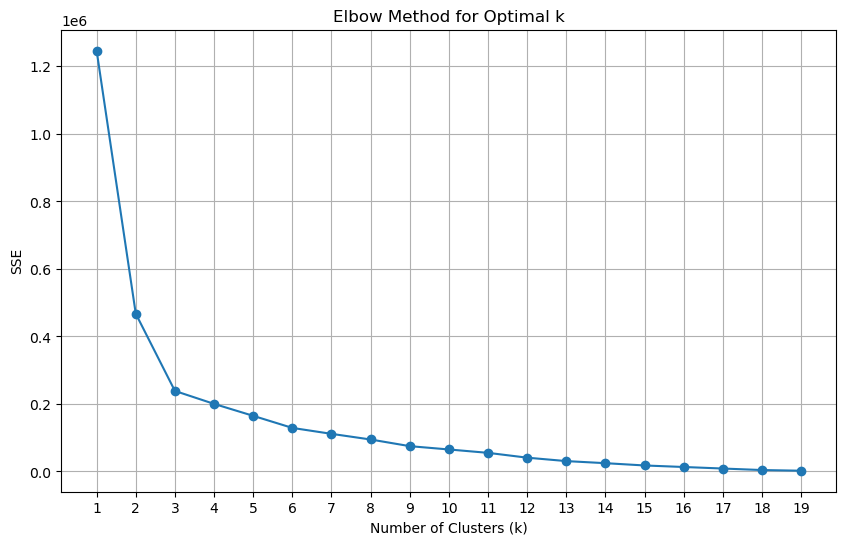

In [ ]:
# To find the Appropriate K value, used the Elbow Method
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

df_numeric = df.drop(columns=['Player'])

# Set the range of Cluster k 1~20
k_values = range(1, 20)
sse = []


# Implement the K-means 
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_numeric)
    sse.append(kmeans.inertia_)

# Visualization
plt.figure(figsize=(10, 6))
plt.plot(k_values, sse, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('SSE')
plt.xticks(k_values)
plt.grid()
plt.show()

### Through the plot, we can say the appropriate K value is 3 